# 🟦 miniROS — Notebook 1
## Introduction to Nodes, Topics, and Moving a Robot

This notebook introduces:
- How to download **miniROS** from GitHub
- How to import the framework in Colab
- Understanding nodes, topics, and `cmd_vel`
- Running a simple simulation
- Visualizing the robot's trajectory

---
### 🔧 Step 1 — Download miniROS from GitHub
Your repository: https://github.com/eder1234/miniROS


In [1]:
!rm -rf miniROS
!git clone https://github.com/eder1234/miniROS.git

Cloning into 'miniROS'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 11.31 KiB | 11.31 MiB/s, done.
Resolving deltas: 100% (20/20), done.


### 🔧 Step 2 — Add miniROS to Python path
This makes the modules importable inside the notebook.

In [2]:
import sys
sys.path.append('/content/miniROS')
print("miniROS loaded.")

miniROS loaded.


### 🔧 Step 3 — Import core miniROS modules
We load the simulator, robot model, and example node.

In [3]:
from core.simulator import MiniRosSimulator
from robots.diffdrive import DiffDriveRobot
from nodes.circle_motion import CircleMotionNode
from core.messages import Twist, Pose2D

### 🤖 Step 4 — Create a simulator + robot
We create a differential-drive robot at the origin `(0,0)` facing right (yaw=0).

In [4]:
sim = MiniRosSimulator(dt=0.05)

robot = DiffDriveRobot(
    init_pose=Pose2D(0.0, 0.0, 0.0),
    radius=0.2,
    cmd_topic="/cmd_vel"
)

sim.add_robot(robot)
print("Robot added.")

Robot added.


### 🧠 Step 5 — Add a controller node
The `CircleMotionNode` publishes a constant linear and angular velocity, making the robot move in a circular trajectory.

In [5]:
controller = CircleMotionNode(v=0.3, w=0.4)

sim.add_node(controller)
print("Controller node added.")

Controller node added.


### ▶️ Step 6 — Run the simulation + animate
This shows a live 2D animation of the robot moving.

⚠️ In Colab, you may need to run:

```
%matplotlib inline
```
or

```
%matplotlib notebook
```
depending on your backend.


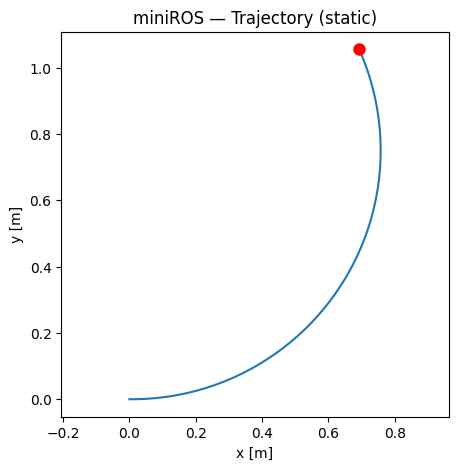

In [6]:
sim.run(5.0)  # run 5 seconds of simulation

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(robot.traj_x, robot.traj_y, '-')
plt.plot(robot.pose.x, robot.pose.y, 'ro', markersize=8)
plt.axis('equal')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("miniROS — Trajectory (static)")
plt.show()


---
# 🎓 Exercises

### **Exercise 1 — Make the robot move in a straight line**
Create a new node that publishes:
```
v = 0.4
w = 0.0
```
Run the animation and observe the trajectory.

---
### **Exercise 2 — Make a square trajectory**
Write a node that:
1. Moves straight for 2 seconds
2. Turns 90° (yaw += π/2)
3. Repeats

Hint: use `self._sim.time` inside your node.

---
### **Exercise 3 — Stop the robot after 5 seconds**
In your node:
- If time < 5 → publish normal commands
- Else → publish Twist(0,0)

Observe the difference.

---
### **Exercise 4 — (Optional) Log robot pose**
Access:
```
robot.pose.x
robot.pose.y
robot.pose.yaw
```
and plot the results using `matplotlib`.

---
### ✔ End of Notebook 1
In the next notebook, we will add:
- obstacles
- a simulated lidar
- reactive obstacle avoidance
